In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
start='2015'
end = '2019-7-16'
#(FB, AMAZON, NETFLIX, GOOGLE, APPLE, MSFT)

facebook = get_pricing('FB',start_date= start, end_date= end)
amzn = get_pricing('AMZN',start_date= start, end_date= end)
netflix = get_pricing('NFLX',start_date= start, end_date= end)
googl= get_pricing('GOOG',start_date= start,end_date=end)
apple = get_pricing('AAPL',start_date= start, end_date= end)
msft = get_pricing('MSFT',start_date= start, end_date= end)

In [3]:
facebook.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,78.58,78.930,77.700,78.45,16415552.0,78.45
2015-01-05 00:00:00+00:00,77.98,79.246,76.860,77.19,23762990.0,77.19
2015-01-06 00:00:00+00:00,77.23,77.590,75.365,76.15,25079293.0,76.15
2015-01-07 00:00:00+00:00,76.76,77.360,75.820,76.14,19657021.0,76.14
2015-01-08 00:00:00+00:00,76.74,78.230,76.080,78.19,21003223.0,78.19


In [4]:
fb_close = facebook['close_price']
amzn_close = amzn['close_price']
nf_close = netflix['close_price']
googl_close = googl['close_price']
apple_close = apple['close_price']
msft_close = msft['close_price']

In [5]:
stocks = pd.concat([fb_close,amzn_close,nf_close,googl_close,apple_close,msft_close],axis=1)
stocks.columns=['FB','AMZN','NFLX','GOOG','AAPL','MSFT']

In [6]:
stocks.tail()

,FB,AMZN,NFLX,GOOG,AAPL,MSFT
2019-07-10 00:00:00+00:00,202.71,2017.77,380.99,1140.480,203.21,137.86
2019-07-11 00:00:00+00:00,201.23,2001.07,379.42,1144.140,201.74,138.40
2019-07-12 00:00:00+00:00,204.90,2010.02,373.24,1144.560,203.24,138.89
2019-07-15 00:00:00+00:00,203.93,2021.00,366.62,1150.680,205.20,138.94
2019-07-16 00:00:00+00:00,203.84,2010.00,365.98,1153.599,204.49,137.08


In [7]:
#Find the average percentage change in 1 day
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

FB      0.001002
AMZN    0.001823
NFLX    0.002099
GOOG    0.000808
AAPL    0.000742
MSFT    0.001145
dtype: float64

In [8]:
#Correlation over time 

fangam_basket = stocks.pct_change(1).corr()

#CORREL MATRIX


## Arithmetic returns

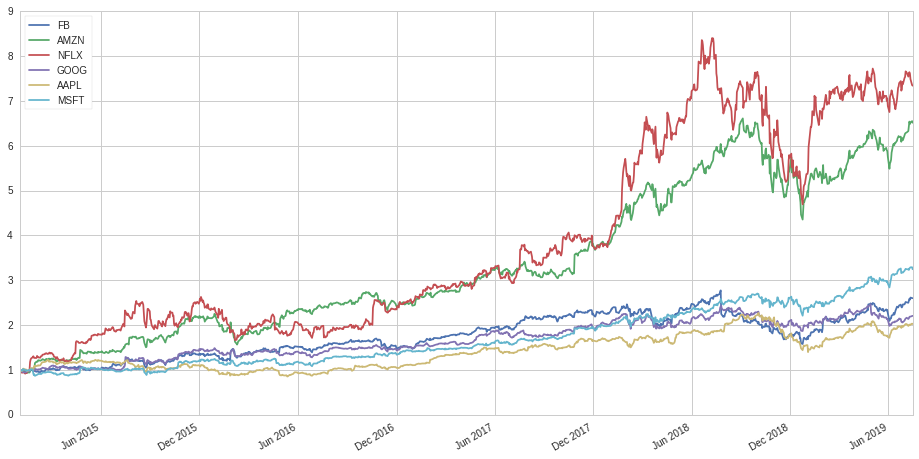

In [9]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(16,8))
avg_in_basket = stocks.mean()

In [10]:
stock_daily_ret= stocks.pct_change(1)
stock_daily_ret.head()

#Facebook -1.6% change 

,FB,AMZN,NFLX,GOOG,AAPL,MSFT
2015-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,-0.016061,-0.020809,-0.050933,-0.020846,-0.027900,-0.008970
2015-01-06 00:00:00+00:00,-0.013473,-0.022542,-0.017100,-0.023857,-0.000193,-0.015762
2015-01-07 00:00:00+00:00,-0.000131,0.010600,0.005054,-0.001018,0.014318,0.013806
2015-01-08 00:00:00+00:00,0.026924,0.006836,0.022359,0.003154,0.038233,0.029414


In [11]:
log_ret= np.log(stocks/stocks.shift(1))
log_ret.head()

,FB,AMZN,NFLX,GOOG,AAPL,MSFT
2015-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00+00:00,-0.016192,-0.021029,-0.052276,-0.021066,-0.028297,-0.009010
2015-01-06 00:00:00+00:00,-0.013565,-0.022800,-0.017248,-0.024147,-0.000193,-0.015887
2015-01-07 00:00:00+00:00,-0.000131,0.010544,0.005041,-0.001018,0.014216,0.013712
2015-01-08 00:00:00+00:00,0.026568,0.006813,0.022113,0.003149,0.037520,0.028990


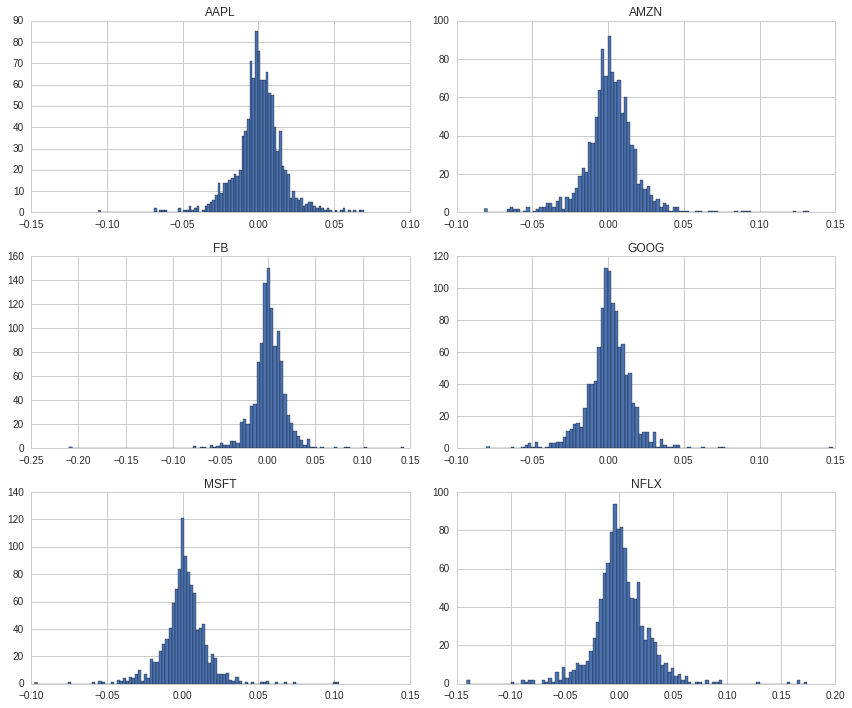

In [12]:
#Distribution of log returns across the time frame
log_ret.hist(bins=100,figsize=(12,10))
plt.tight_layout()

In [13]:
log_ret.dropna(axis=0).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FB,1140.0,0.000838,0.018183,-0.210090,-0.006588,0.000964,0.010451,0.143672
AMZN,1140.0,0.001644,0.018802,-0.081787,-0.006454,0.001468,0.010588,0.132646
NFLX,1140.0,0.001749,0.026339,-0.140769,-0.010781,0.000442,0.014812,0.173989
GOOG,1140.0,0.000693,0.015095,-0.080315,-0.006009,0.000581,0.008255,0.148200
AAPL,1140.0,0.000618,0.015787,-0.105663,-0.006134,0.000598,0.008657,0.069624
MSFT,1140.0,0.001032,0.014970,-0.097698,-0.005419,0.000788,0.007902,0.103175


In [14]:
log_ret.cov()*252  # Multiply by 252 working days


,FB,AMZN,NFLX,GOOG,AAPL,MSFT
FB,0.083319,0.048777,0.048912,0.041924,0.032777,0.034474
AMZN,0.048777,0.089083,0.061834,0.047377,0.036943,0.043935
NFLX,0.048912,0.061834,0.174827,0.048312,0.039968,0.044018
GOOG,0.041924,0.047377,0.048312,0.057420,0.031285,0.037894
AAPL,0.032777,0.036943,0.039968,0.031285,0.062809,0.034209
MSFT,0.034474,0.043935,0.044018,0.037894,0.034209,0.056475


### Monte Carlo Stimulation

In [46]:
k= 30000

all_weights = np.zeros((k, len(stocks.columns)))
#creates an array of k zeros

returns_arr = np.zeros(k)
volatility_arr = np.zeros(k)
sharpe_arr = np.zeros(k)

for ind in range(k):
    #create random weights
    weights= np.array(np.random.random(6))
    
    #rebalance weights
    weights= weights/np.sum(weights)
    
    #Save weights into all_weights given k array length
    all_weights[ind:] = weights 
    
    #Expected returns
    returns_arr[ind] = np.sum((log_ret.mean()*weights)*252)
    
    #Expected Variance
    volatility_arr[ind]= np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))
    
    #Sharpe Ratio
    sharpe_arr[ind] = returns_arr[ind]/volatility_arr[ind]

NameError: name 'volatility_arr' is not defined

In [16]:
print'The highest Sharpe Ratio generated was', (sharpe_arr.max().round(2))
print'The location of the highest Sharpe ratio generated was', sharpe_arr.argmax()
print'The optimised portfolio allocation is ','\n', ((all_weights[sharpe_arr.argmax()][0])*100).round(2),'% in',stocks.columns[0].upper(),'\n',((all_weights[sharpe_arr.argmax()][1])*100).round(2),'% in',stocks.columns[1].upper(),'\n',((all_weights[sharpe_arr.argmax()][2])*100).round(2),'% in',stocks.columns[2].upper(),'\n',((all_weights[sharpe_arr.argmax()][3])*100).round(2),'% in',stocks.columns[3].upper(),'\n',((all_weights[sharpe_arr.argmax()][4])*100).round(2),'% in',stocks.columns[4].upper(),'\n',((all_weights[sharpe_arr.argmax()][5])*100).round(2),'% in',stocks.columns[5].upper()

#all_weights[sharpe_arr.argmax()][0])*100).round(2),'% in',stocks.columns[0].upper()
# The above returns the weight of the stock which returns the highest sharpe ratio. 

The highest Sharpe Ratio generated was 1.44
The location of the highest Sharpe ratio generated was 8667
The optimised portfolio allocation is  
1.33 % in FB 
53.74 % in AMZN 
12.85 % in NFLX 
3.86 % in GOOG 
2.22 % in AAPL 
26.0 % in MSFT


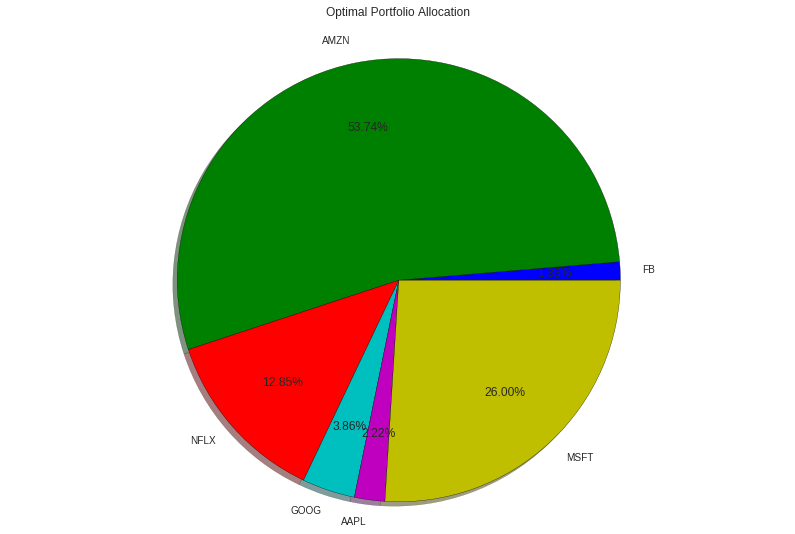

In [42]:
pieLabels = [stocks.columns[0].upper(),stocks.columns[1].upper(),
            stocks.columns[2].upper(),stocks.columns[3].upper(),stocks.columns[4].upper(),stocks.columns[5].upper()]

x = [all_weights[sharpe_arr.argmax()][0],all_weights[sharpe_arr.argmax()][1],
     all_weights[sharpe_arr.argmax()][2],all_weights[sharpe_arr.argmax()][3],
     all_weights[sharpe_arr.argmax()][4],all_weights[sharpe_arr.argmax()][5]]

     
plt.pie(x,labels=pieLabels,autopct='%1.2f%%',pctdistance = 0.7,shadow=True);
plt.title('Optimal Portfolio Allocation', y=1.08)
plt.axis('equal')
plt.show()

### Plotting the data

In [43]:
max_sr_ret = returns_arr[sharpe_arr.argmax()]
max_sr_vol = volatility_arr[sharpe_arr.argmax()]
print 'The returns at position',sharpe_arr.argmax(),'is', max_sr_ret.round(4)
print 'The volatility at position', sharpe_arr.argmax(), 'is', max_sr_vol.round(4)

The returns at position 8667 is 0.3599
The volatility at position 8667 is 0.2495


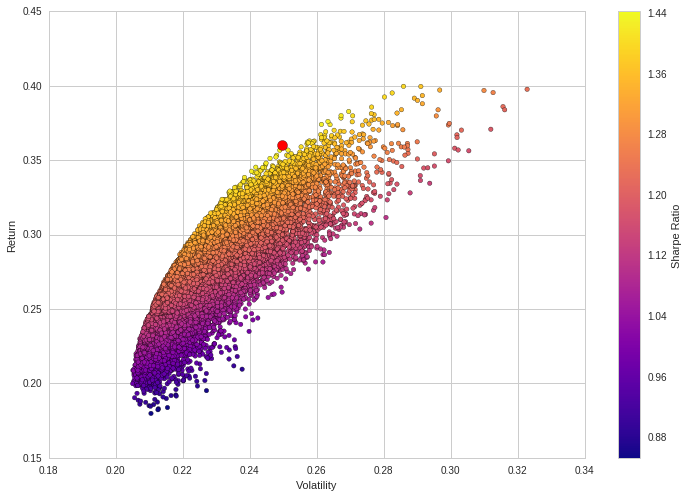

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(volume_arr,returns_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


#Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')

## The sharpe ratio is the plotted.